In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# Loading in data
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
myopia_df["MYOPIC"].value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [4]:
# Dropping myopic column
new_myopia_df = myopia_df.drop(columns = ["MYOPIC"])
labels = myopia_df["MYOPIC"]
new_myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Find null values
for column in new_myopia_df.columns:
    print(f"Column {column} has {myopia_df[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [6]:
# Find duplicate entries
print(f"Duplicate entries: {myopia_df.duplicated().sum()}")

Duplicate entries: 0


In [7]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
myopia_scaled_data = scaler.fit_transform(new_myopia_df)

In [8]:
myopia_scaled_data[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

In [9]:
# Create a new dataframe with the transformed data
myopia_scaled_df = pd.DataFrame(myopia_scaled_data, columns = new_myopia_df.columns[0:])
myopia_scaled_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [10]:
# Initialise PCA model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components = 0.90)

myopia_pca = pca.fit_transform(myopia_scaled_data)

In [11]:
# Transform PCA data to a dataframe
myopia_pca.shape

(618, 10)

In [12]:
myopia_pca_df = pd.DataFrame(data = myopia_pca)
myopia_pca_df

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581


In [13]:
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [14]:
from sklearn.manifold import TSNE

# Run TSNE
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(myopia_pca)

C:\Users\Public\anaconda3\envs\PythonData38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [15]:
tsne_features.shape

(618, 2)

In [16]:
myopia_tsne_df = pd.DataFrame(data = tsne_features)
myopia_tsne_df

,0,1
0,-16.798271,-4.819967
1,-2.790409,-15.539436
2,14.731493,9.230467
3,22.126333,-19.169710
4,-6.938234,5.389585
...,...,...
613,-23.531637,9.526871
614,-2.342605,-15.089631
615,-0.764174,-15.378129
616,23.026432,17.794613


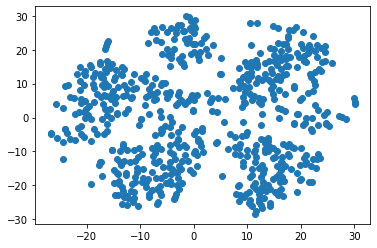

In [17]:
# Scatter plot of the t-SNE output
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0],tsne_features[:,1])
plt.show()

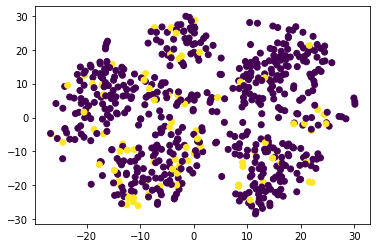

In [18]:
plt.scatter(tsne_features[:,0],tsne_features[:,1], c = labels)
plt.show()

In [19]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

C:\Users\Public\anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


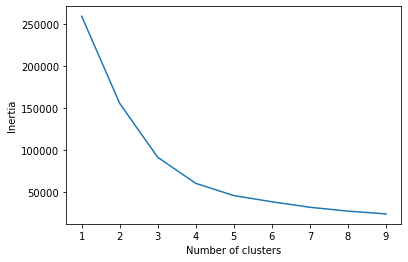

In [20]:
inertia = []
n = 10
k = list(range(1,n))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters = i, random_state = 42).fit(myopia_tsne_df)
# km.fit(myopia_tsne_df)
    inertia.append(km.inertia_)
    
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(range(1,n))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

### Elbow observation
Based on the graph, the elbow of the plot appears to be either at k = 3 or k = 5

### Conclusion
Based on the data, I found that the patients can be placed in 5 definitive groups using unsupervised learning.  As one can observe from the scatter plots with the naked eyes, there appears to be 5 distinctive clusters.